# Universidad Nacional de Loja
## Implementación de una Red Neuronal con Backpropagation
- **Nombre: Jhandry Santiago Chimbo Rivera**
- **Carrera: Ingeniería en Computación**
- **Práctica: Redes Neuronales Artificiales - TPEN1**

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style="whitegrid")
# Generar el dataset de "moons"
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Convertir a vector columna

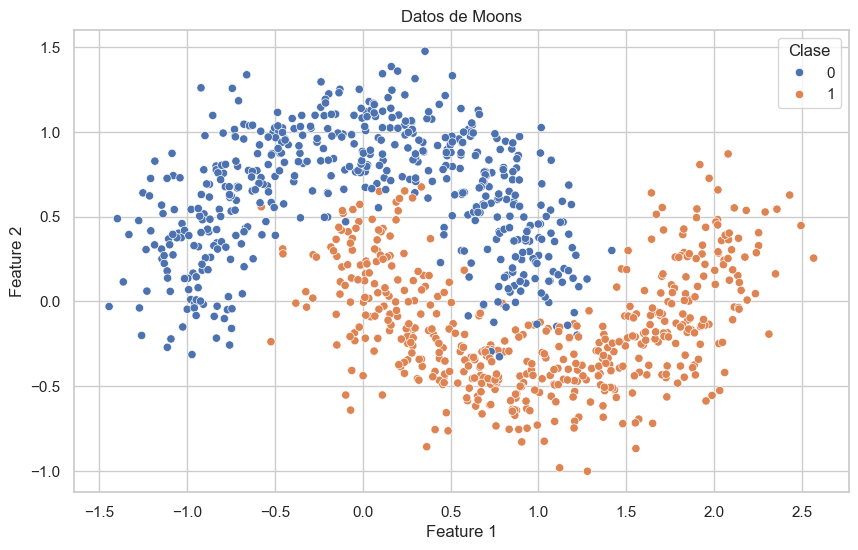

In [3]:
# Visualizar los datos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='deep')
plt.title('Datos de Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Clase')
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# --- Parte 2: Definición de funciones de activación y pérdida ---
# En este bloque se definen las funciones matemáticas clave para la red neuronal:
# - La función de activación sigmoide, que introduce no linealidad y permite que la red aprenda relaciones complejas.
# - Su derivada, necesaria para el cálculo del gradiente durante el backpropagation.
# - La función de pérdida de entropía cruzada binaria, que mide el error entre las predicciones y las etiquetas reales, guiando el proceso de aprendizaje.

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

In [7]:
# --- Parte 3: Inicialización de parámetros ---
# En este bloque se inicializan los hiperparámetros y los pesos de la red neuronal:
# - input_size, hidden_size, output_size: definen la arquitectura de la red.
# - learning_rate y epochs: controlan el proceso de entrenamiento.
# - W1, b1, W2, b2: pesos y sesgos de las capas, inicializados aleatoriamente (pesos) o en cero (sesgos).
# - loss_history: lista para almacenar la evolución de la función de pérdida durante el entrenamiento.

np.random.seed(42)
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 900

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
loss_history = []

In [8]:
# --- Parte 4: Entrenamiento con Backpropagation ---
# En este bloque se realiza el entrenamiento de la red neuronal utilizando el algoritmo de backpropagation.
# En cada época, se ejecuta una pasada hacia adelante (forward) para calcular las predicciones y la pérdida, seguida de una pasada hacia atrás (backward) para calcular los gradientes y actualizar los pesos.
# El historial de la función de pérdida se almacena para su posterior análisis y visualización.
for epoch in range(epochs):
    # Forward
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Pérdida
    loss = binary_cross_entropy(y_train, A2)
    loss_history.append(loss)

    # Backward
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Actualización de pesos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Mostrar progreso
    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

Epoch 0 - Loss: 0.7177
Epoch 100 - Loss: 0.1640
Epoch 200 - Loss: 0.0918
Epoch 300 - Loss: 0.0836
Epoch 400 - Loss: 0.0803
Epoch 500 - Loss: 0.0783
Epoch 600 - Loss: 0.0769
Epoch 700 - Loss: 0.0760
Epoch 800 - Loss: 0.0753


In [9]:
# --- Parte 5: Evaluación del modelo ---
# En este bloque se define la función de predicción y se evalúa el desempeño de la red neuronal en el conjunto de prueba.
# La función 'predict' realiza una pasada hacia adelante y aplica un umbral de 0.5 para clasificar las muestras.
# Finalmente, se calcula y muestra la precisión obtenida en el conjunto de prueba.

def predict(X):
    A1 = sigmoid(np.dot(X, W1) + b1)
    A2 = sigmoid(np.dot(A1, W2) + b2)
    return (A2 > 0.5).astype(int)

y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"\nPrecisión en el conjunto de prueba: {accuracy:.2%}")


Precisión en el conjunto de prueba: 97.00%


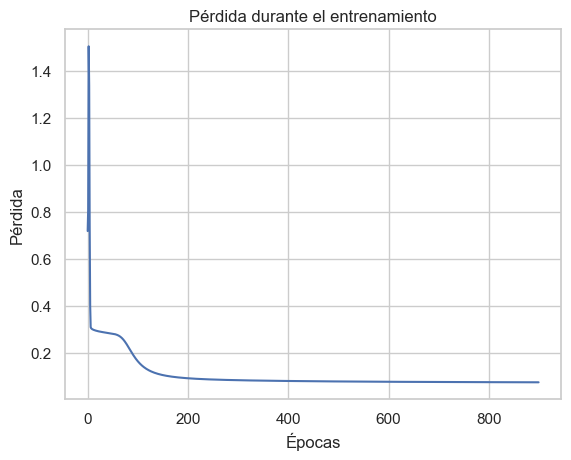

In [10]:
# --- Parte 6: Visualización de la pérdida ---
plt.plot(loss_history)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7216\1668394669.py:11: UserWarning: The following kwargs were not used by contour: 'antaliaze'
  plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3, levels=20, antaliaze=True)


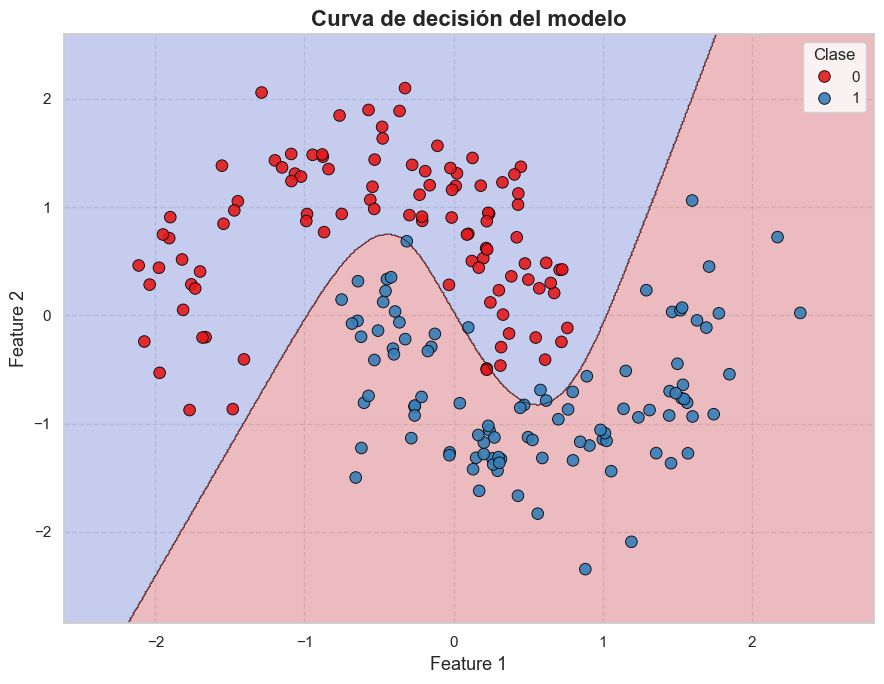

In [11]:
# visualización de la frontera de decisión
def plot_decision_boundary(predict_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(9, 7))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3, levels=20, antaliaze=True)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5, levels=[0.5])
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y.flatten(),
        palette='Set1', edgecolor='black', s=70, alpha=0.9
    )
    plt.title("Curva de decisión del modelo", fontsize=16, weight='bold')
    plt.xlabel("Feature 1", fontsize=13)
    plt.ylabel("Feature 2", fontsize=13)
    plt.legend(title='Clase', fontsize=11, title_fontsize=12, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(predict, X_test, y_test)

## 📈 Interpretación de Resultados

### Precisión obtenida en el conjunto de prueba

Después de entrenar la red neuronal durante 900 épocas, se obtuvo una precisión aproximada de **97%** sobre el conjunto de prueba. Esta métrica indica que el modelo fue capaz de clasificar correctamente cerca del 97% de las muestras no vistas, lo cual es un buen resultado considerando que se trata de una implementación desde cero con una arquitectura simple.

Este nivel de precisión sugiere que:
- El modelo aprendió correctamente la forma no lineal de separación entre clases (forma de luna).
- La red logró una buena generalización, al menos para el conjunto de datos usado (`make_moons` con ruido 0.2).

### Curva de pérdida

La gráfica de la función de pérdida muestra una disminución progresiva a lo largo de las épocas, lo cual es una señal de que el modelo está aprendiendo y ajustando sus pesos correctamente a través del algoritmo de backpropagation.

---

## Posibles mejoras al modelo

Aunque el modelo tiene un buen rendimiento, existen varias estrategias que podrían mejorar su desempeño:

### 1. **Arquitectura del modelo**
- **Número de capas ocultas**: Añadir una segunda capa oculta permitiría a la red aprender representaciones más complejas y profundas.
- **Número de neuronas por capa**: Aumentar el número de neuronas (por ejemplo, de 4 a 8 o 16) puede mejorar la capacidad de aprendizaje del modelo.

### 2. **Regularización**
- Técnicas como **L2 regularization** o **Dropout** podrían evitar el sobreajuste, especialmente si se observa que el rendimiento en entrenamiento es alto pero en prueba es bajo.

### Preguntas de Control

1. **¿Cómo afecta la tasa de aprendizaje al proceso de entrenamiento?**  
   Una tasa de aprendizaje muy alta puede provocar que el modelo no converja o salte sobre los mínimos. Una tasa muy baja puede hacer que el entrenamiento sea lento o se quede estancado.

2. **¿Qué sucede si aumentamos el número de épocas? ¿Y si lo disminuimos?**  
   Aumentar el número de épocas puede mejorar la precisión si el modelo no ha convergido. Si se disminuye demasiado, el modelo puede quedar subentrenado.

3. **¿Qué impacto tienen las funciones de activación y la inicialización de pesos en el desempeño del modelo?**  
   La función de activación afecta cómo se propagan los gradientes y la capacidad del modelo para aprender representaciones no lineales. Una mala inicialización de pesos puede causar que la red aprenda lentamente o no aprenda en absoluto.

### Conclusiones

- El modelo actual es una implementación funcional y eficiente de una red neuronal con backpropagation, logrando una alta precisión en una tarea de clasificación no lineal. Con algunas de las mejoras mencionadas, se podría aumentar su rendimiento, estabilidad y capacidad de generalización.

- La correcta elección de la tasa de aprendizaje y la función de activación es clave para obtener buenos resultados.